# Task 1

In [818]:
import pandas as pd
import utils
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
importlib.reload(utils)


<module 'utils' from '/Users/vittoriameroni/Downloads/utils.py'>

## Files loading

In [821]:
beers_adv=pd.read_csv('data/birre/BeerAdvocate/beers.csv')
beers_rate =pd.read_csv('data/birre/RateBeer/beers.csv')

# Data processing

### Beers

In [824]:
utils.dataset_information(beers_adv, "Beers_BA")
utils.dataset_information(beers_rate, "Beers_RB")



########################################################
We are starting analysing dataset Beers_BA
- Dimension of starting dataset: (280823, 15)
- Columns of dataset:  Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    beer_id           beer_name  brewery_id            brewery_name  \
0   166064    Nashe Moskovskoe       39912  Abdysh-Ata (Абдыш Ата)   
1   166065     Nashe Pivovskoe       39912  Abdysh-Ata (Абдыш Ата)   
2   166066  Nashe Shakhterskoe       39912  Abdysh-Ata (Абдыш Ата)   
3   166067  Nashe Zhigulevskoe       39912  Abdysh-Ata (Абдыш Ата)   
4   166063              Zhivoe       39912  Abdysh-Ata (Абдыш Ата)   

             style  nbr_

Ensurance of correct data types:

In [828]:
utils.ensure_col_types(beers_adv,
                       ['beer_id', 'brewery_id', 'nbr_ratings', 'nbr_reviews', 'nbr_matched_valid_ratings'],
                       ['abv'],
                       ['beer_name', 'brewery_name', 'style'])
utils.ensure_col_types(beers_rate,
                       ['beer_id', 'brewery_id', 'nbr_ratings', 'nbr_matched_valid_ratings'],
                       ['abv'],
                       ['beer_name', 'brewery_name', 'style'])

In [830]:
beers_adv.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [832]:

beers_adv_copy=beers_adv.copy()
beers_rate_copy=beers_rate.copy()
beers_adv_copy= beers_adv.dropna(subset=['ba_score'])
beers_rate_copy = beers_rate.dropna(subset=['overall_score'])

       beer_id  ba_score  overall_score
82         243      85.0            0.0
172       8081      77.0            0.0
187       2416      88.0            0.0
542      88574      82.0            0.0
1075     36846      86.0            0.0
...        ...       ...            ...
17777     9208      79.0            0.0
17778    18001      86.0            0.0
17841    15803      80.0            0.0
18038      769      88.0            0.0
18286    89775      79.0            0.0

[98 rows x 3 columns]


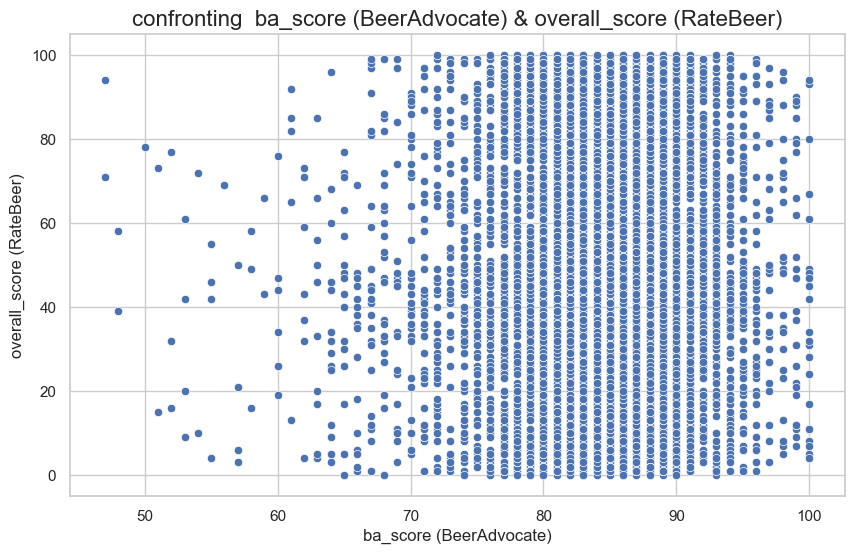

In [834]:

df_combined = pd.merge(beers_adv_copy[['beer_id', 'ba_score']], 
                       beers_rate_copy [['beer_id', 'overall_score']], 
                       on='beer_id', 
                       how='inner')
print(df_combined[df_combined['overall_score']==0])
# Crea il grafico a dispersione
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ba_score', y='overall_score', data=df_combined)

# Aggiungi titolo e etichette agli assi
plt.title('confronting  ba_score (BeerAdvocate) & overall_score (RateBeer)', fontsize=16)
plt.xlabel('ba_score (BeerAdvocate)', fontsize=12)
plt.ylabel('overall_score (RateBeer)', fontsize=12)

# Mostra il grafico
plt.show()

In [836]:
correlation = df_combined['ba_score'].corr(df_combined['overall_score'])
print(f"Correlazione tra ba_score e overall_score: {correlation}")


Correlazione tra ba_score e overall_score: 0.06922364297781021


the two rating seems to not be correlated and the two distribution look really different from each other.
the shapiro test will show if the two distribution are normal

In [839]:
from scipy import stats

ba_scores = beers_adv_copy['ba_score']
overall_scores= beers_rate_copy['overall_score']

shapiro_ba = stats.shapiro(ba_scores)
shapiro_rb = stats.shapiro(overall_scores)

print(f"Shapiro-Wilk test for ba_score (BeerAdvocate):")
print(f"Statistic : {shapiro_ba[0]}, p-value: {shapiro_ba[1]}")

print(f"\nShapiro-Wilk test for overall_score (RateBeer):")
print(f"Statistic : {shapiro_rb[0]}, p-value: {shapiro_rb[1]}")

# Interpretazione dei risultati
if shapiro_ba[1] > 0.05:
    print("\n ba_score distribution is  normal.")
else:
    print("\n ba_scoree distribution is not normal.")

if shapiro_rb[1] > 0.05:
    print("\n overall_scoredistribution is  normal.")
else:
    print("\n overall_score distribution is not normal.")


Shapiro-Wilk test for ba_score (BeerAdvocate):
Statistic : 0.9134540996354495, p-value: 9.415785715025507e-98

Shapiro-Wilk test for overall_score (RateBeer):
Statistic : 0.9513207087130219, p-value: 3.299945714810252e-94

 ba_scoree distribution is not normal.

 overall_score distribution is not normal.


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 61200.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 104028.
  res = hypotest_fun_out(*samples, **kwds)


In [841]:
 since the two distribution are not normal we need to performs a Wilcoxon signed-rank test, 
a non-parametric statistical test that compares two paired samples to see if their distributions differ significantly.

SyntaxError: invalid syntax (3984825332.py, line 1)

In [843]:
from scipy.stats import wilcoxon


ba_scores = beers_adv_copy['ba_score']
overall_scores= beers_rate_copy['overall_score']
min_length = min(len(ba_scores), len(overall_scores))
ba_scores = ba_scores[:min_length]
overall_scores = overall_scores[:min_length]
stat, p_value = wilcoxon(ba_scores, overall_scores)

print(f"Statistic test di Wilcoxon: {stat}")
print(f"P-value: {p_value}")

# Interpretazione del risultato
if p_value < 0.05:
    print("there is a statistically significant difference between the scores.")
else:
    print("it does not find a significant difference.")


Statistic test di Wilcoxon: 129320605.5
P-value: 0.0
there is a statistically significant difference between the scores.


In [845]:
beers_adv_filt = beers_adv[(beers_adv['nbr_ratings'] != 0) & (beers_adv['nbr_reviews'] != 0)].copy()
beers_rate_filt = beers_rate[(beers_rate['nbr_ratings'] != 0)].copy()
beers_rate_filt['nbr_ratings'].describe()

count    396690.000000
mean         17.953752
std          85.303131
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max        5272.000000
Name: nbr_ratings, dtype: float64

In [855]:
beers_adv_filt_unique = beers_adv_filt.drop_duplicates(subset='beer_id', keep='first').reset_index(drop=True)

utils.dataset_information(beers_adv_filt_unique, "Filtered + Unique Beers_BA")
beers_rate_filt_unique = beers_rate_filt.drop_duplicates(subset='beer_id', keep='first').reset_index(drop=True)

utils.dataset_information(beers_rate_filt_unique, "Filtered + Unique Beers_BA")



########################################################
We are starting analysing dataset Filtered + Unique Beers_BA
- Dimension of starting dataset: (166649, 15)
- Columns of dataset:  Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    beer_id           beer_name  brewery_id  \
0   142544               Régab       37262   
1    19590       Barelegs Brew       10093   
2    19827            Legbiter       10093   
3    20841   St. Patrick's Ale       10093   
4    20842  St. Patrick's Best       10093   

                                brewery_name             style  nbr_ratings  \
0  Societe des Brasseries du Gabon (SOBRAGA)   Euro Pale Lager         

### Let's try to rescale

In [861]:
def scale(series):
    min_val = series.min(skipna=True)
    max_val = series.max(skipna=True)
    print(min_val)
    return (series - min_val) *100/ (max_val - min_val)

def scale_zscore(series):
    series = series.dropna()
    mean_val = series.mean()
    std_dev = series.std()
    if std_dev == 0:
        return series * 0  # Se tutti i valori sono uguali, restituisci una serie di zeri
    
    # Calcola solo lo z-score senza normalizzarlo
    zscore_series = (series - mean_val) / std_dev
    
    return zscore_series



In [863]:
beers_adv_filt_unique= beers_adv_filt_unique.dropna(subset=['ba_score'])
beers_rate_filt_unique = beers_rate_filt_unique.dropna(subset=['overall_score'])

# Applica la funzione scale alla colonna 'ba_score'
beers_adv_filt_unique['ba_score_scaled'] = scale(beers_adv_filt_unique['ba_score'])
beers_rate_filt_unique['overall_score_scaled'] = scale(beers_rate_filt_unique['overall_score'])

# Applica la funzione scale_zscore alle stesse colonne
beers_adv_filt_unique['ba_score_zscore'] = scale_zscore(beers_adv_filt_unique['ba_score'])
beers_rate_filt_unique['overall_score_zscore'] = scale_zscore(beers_rate_filt_unique['overall_score'])

print(beers_adv_filt_unique[['ba_score', 'ba_score_scaled', 'ba_score_zscore']].head())
print(beers_rate_filt_unique[['overall_score', 'overall_score_scaled', 'overall_score_zscore']].head())


46.0
0.0
    ba_score  ba_score_scaled  ba_score_zscore
2       80.0        62.962963        -1.127443
4       82.0        66.666667        -0.640708
6       77.0        57.407407        -1.857546
12      84.0        70.370370        -0.153972
13      82.0        66.666667        -0.640708
    overall_score  overall_score_scaled  overall_score_zscore
1             5.0                   5.0             -1.779357
2             1.0                   1.0             -1.919794
23           69.0                  69.0              0.467624
34           64.0                  64.0              0.292079
38           69.0                  69.0              0.467624


confront again the distribution

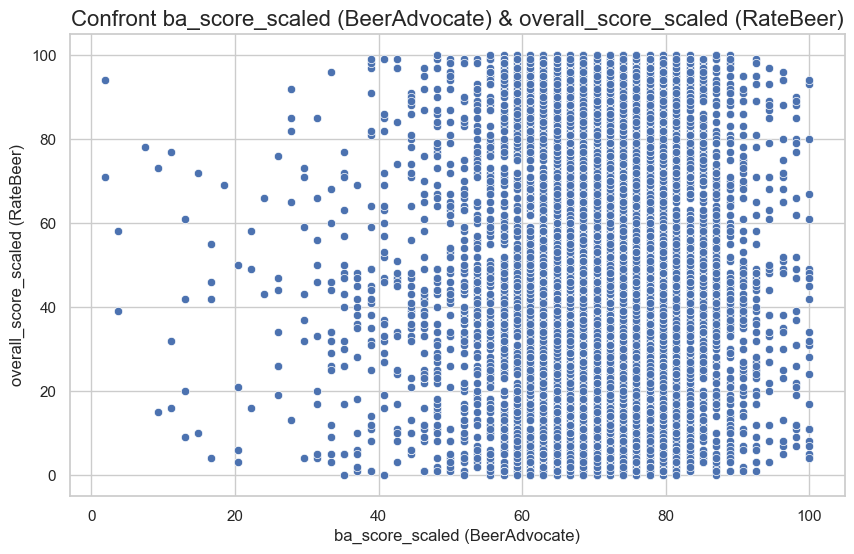

ValueError: Could not interpret value `ba_score_zscore` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [866]:
import matplotlib.pyplot as plt
import seaborn as sns
df_combined = pd.merge(beers_adv_filt_unique[['beer_id', 'ba_score_scaled']], 
                       beers_rate_filt_unique[['beer_id', 'overall_score_scaled']], 
                       on='beer_id', 
                       how='inner')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ba_score_scaled', y='overall_score_scaled', data=df_combined)
plt.title('Confront ba_score_scaled (BeerAdvocate) & overall_score_scaled (RateBeer)', fontsize=16)
plt.xlabel('ba_score_scaled (BeerAdvocate)', fontsize=12)
plt.ylabel('overall_score_scaled (RateBeer)', fontsize=12)
plt.show()
df_combined_two = pd.merge(beers_adv_filt_unique[['beer_id', 'ba_score_zscore']], 
                       beers_rate_filt_unique[['beer_id', 'overall_score_zscore']], 
                       on='beer_id', 
                       how='inner')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ba_score_zscore', y='overall_score_zscore', data=df_combined)
plt.title('Confront ba_score_zscore (BeerAdvocate) & overall_score_zscore (RateBeer)', fontsize=16)
plt.xlabel('ba_score_zscore (BeerAdvocate)', fontsize=12)
plt.ylabel('overall_score_zscore (RateBeer)', fontsize=12)
plt.show()



In [868]:


correlation = df_combined['ba_score_scaled'].corr(df_combined['overall_score_scaled'])
print(f"Correlazione tra ba_score_scaled e overall_score_scaled: {correlation}")

correlation = df_combined_two['ba_score_zscore'].corr(df_combined_two['overall_score_zscore'])
print(f"Correlazione tra ba_score_zscore e overall_score_zscore: {correlation}")


Correlazione tra ba_score_scaled e overall_score_scaled: 0.0692607304775879
Correlazione tra ba_score_zscore e overall_score_zscore: 0.06926073047758802


Location analysis:

In [882]:
from scipy import stats
ba_scores_s =beers_adv_filt_unique['ba_score_scaled']
overall_scores_s =beers_rate_filt_unique['overall_score_scaled']
shapiro_ba = stats.shapiro(ba_scores_s)
shapiro_rb = stats.shapiro(overall_scores_s)

print(f"Shapiro-Wilk test for ba_score (BeerAdvocate):")
print(f"Statistic : {shapiro_ba[0]}, p-value: {shapiro_ba[1]}")

print(f"\nShapiro-Wilk test for overall_score (RateBeer):")
print(f"Statistic : {shapiro_rb[0]}, p-value: {shapiro_rb[1]}")

# Interpretazione dei risultati
if shapiro_ba[1] > 0.05:
    print("\n ba_score_scaled distribution is  normal.")
else:
    print("\n ba_score_scaled distribution is not normal.")

if shapiro_rb[1] > 0.05:
    print("\n overall_score_scaled distribution is  normal.")
else:
    print("\n overall_score_scaled distribution is not normal.")



Shapiro-Wilk test for ba_score (BeerAdvocate):
Statistic : 0.9166586667941555, p-value: 4.211819808107612e-96

Shapiro-Wilk test for overall_score (RateBeer):
Statistic : 0.9513207087130219, p-value: 3.299945714810252e-94

 ba_score_scaled distribution is not normal.

 overall_score_scaled distribution is not normal.


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 59266.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 104028.
  res = hypotest_fun_out(*samples, **kwds)


In [884]:
from scipy import stats

ba_scores_z = beers_adv_filt_unique['ba_score_zscore']
overall_scores_z= beers_rate_filt_unique['overall_score_zscore']

shapiro_ba = stats.shapiro(ba_scores_z)
shapiro_rb = stats.shapiro(overall_scores_z)

print(f"Shapiro-Wilk test for ba_score (BeerAdvocate):")
print(f"Statistic : {shapiro_ba[0]}, p-value: {shapiro_ba[1]}")

print(f"\nShapiro-Wilk test for overall_score (RateBeer):")
print(f"Statistic : {shapiro_rb[0]}, p-value: {shapiro_rb[1]}")

# Interpretazione dei risultati
if shapiro_ba[1] > 0.05:
    print("\n ba_score_zscore distribution is  normal.")
else:
    print("\n ba_scoree_zscore distribution is not normal.")

if shapiro_rb[1] > 0.05:
    print("\n overall_score_zscore distribution is  normal.")
else:
    print("\n overall_score_zscore distribution is not normal.")



Shapiro-Wilk test for ba_score (BeerAdvocate):
Statistic : 0.9166586667941548, p-value: 4.211819808105451e-96

Shapiro-Wilk test for overall_score (RateBeer):
Statistic : 0.9513207087130219, p-value: 3.299945714810252e-94

 ba_scoree_zscore distribution is not normal.

 overall_score_zscore distribution is not normal.


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 59266.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 104028.
  res = hypotest_fun_out(*samples, **kwds)


In [886]:

min_length = min(len(ba_scores_s), len(overall_scores_s))
ba_scores_s = ba_scores_s[:min_length]
overall_scores_s = overall_scores_s[:min_length]
stat, p_value = wilcoxon(ba_scores_s, overall_scores_s)

print(f"Statistic test di Wilcoxon: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("there is a statistically significant difference between the scores.")
else:
    print("it does not find a significant difference.")


Statistic test di Wilcoxon: 322233257.0
P-value: 0.0
there is a statistically significant difference between the scores.


In [890]:
min_length = min(len(ba_scores_z), len(overall_scores_z))
ba_scores_z = ba_scores_z[:min_length]
overall_scores_z= overall_scores_z[:min_length]
stat, p_value = wilcoxon(ba_scores_z, overall_scores_z)

print(f"Statistic test di Wilcoxon: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("there is a statistically significant difference between the scores.")
else:
    print("it does not find a significant difference.")


Statistic test di Wilcoxon: 759447655.0
P-value: 1.3703366199964037e-178
there is a statistically significant difference between the scores.
